In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_theme()
plt.style.use("seaborn-poster")
data_exploitable = pd.read_excel('./data_exploitable.xls', index_col=0)

In [7]:
#Sigma Clipping 
q = np.percentile(data_exploitable.P13_POP, [25, 50, 75])
mv = q[1]
sigma = 0.74 * (q[2] - q[0])

In [8]:
data_exploitable_oringinal = data_exploitable.copy()
data_exploitable = data_exploitable_oringinal[( data_exploitable.P13_POP > mv - 5.0 * sigma )  & (data_exploitable.P13_POP < mv + 5.0 * sigma)]

## Analyse en composantes principales

In [9]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [10]:
data_exploitable_oringinal.info()
# data_exploitable.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30867 entries, 0 to 30866
Data columns (total 64 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Code du département                                30867 non-null  object 
 1   Libellé du département                             30867 non-null  object 
 2   Code de la commune                                 30867 non-null  int64  
 3   Libellé de la commune                              30867 non-null  object 
 4   Inscrits                                           30867 non-null  int64  
 5   Abstentions                                        30867 non-null  int64  
 6   Blancs et nuls                                     30867 non-null  int64  
 7   Choix A                                            30867 non-null  int64  
 8   Choix B                                            30867 non-null  int64  
 9   CODGEO

In [11]:
target = data_exploitable_oringinal["voting_result"]
# target = data_exploitable["voting_result"]

In [12]:
data = data_exploitable_oringinal.iloc[:, 43:60]

data_2 = data_exploitable_oringinal.select_dtypes(exclude='object')
data_2 = data_2.drop(columns=["Abstentions", 
                              "Blancs et nuls", 
                              "Choix A", "Choix B", 
                              "Percentage_ABSTENTION_VS_POP_TOTAL",
                              "Percentage_BlANC_NUL_VS_POP_TOTAL",
                              "Percentage_CHOIX_A_VS_POP_TOTAL",
                              "Percentage_CHOIX_B_VS_POP_TOTAL", 
                              "voting_result"])

data_2 = data_2.loc[:,"Percentage_POP_FEMME_HOMME_19PLUS_VS_POP_TOTAL": "Percentage_INSCRITE_VS_POP_TOTAL"]
data_2 = pd.concat([data_2, data_exploitable_oringinal["MED13"].to_frame(), 
                   data_exploitable_oringinal["P13_POP"]], axis=1)
# # test if we only use the original features;
# data_3 = data_exploitable_oringinal.iloc[:, 4:43]
# data_3 = data_3.select_dtypes(exclude='object')
# data_3 = data_3.drop(["Abstentions", "Blancs et nuls", "Choix A", "Choix B", 
#                      "voting_result", ], axis = 1)

In [13]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30867 entries, 0 to 30866
Data columns (total 19 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Percentage_POP_FEMME_HOMME_19PLUS_VS_POP_TOTAL     30867 non-null  float64
 1   Percentage_CS_FEMME_HOMME_16PLUS_CS1_VS_POP_TOTAL  30867 non-null  float64
 2   Percentage_CS_FEMME_HOMME_16PLUS_CS2_VS_POP_TOTAL  30867 non-null  float64
 3   Percentage_CS_FEMME_HOMME_16PLUS_CS3_VS_POP_TOTAL  30867 non-null  float64
 4   Percentage_CS_FEMME_HOMME_16PLUS_CS4_VS_POP_TOTAL  30867 non-null  float64
 5   Percentage_CS_FEMME_HOMME_16PLUS_CS5_VS_POP_TOTAL  30867 non-null  float64
 6   Percentage_CS_FEMME_HOMME_16PLUS_CS6_VS_POP_TOTAL  30867 non-null  float64
 7   Percentage_CS_FEMME_HOMME_16PLUS_CS7_VS_POP_TOTAL  30867 non-null  float64
 8   Percentage_CS_FEMME_HOMME_16PLUS_CS8_VS_POP_TOTAL  30867 non-null  float64
 9   Percen

In [14]:
scaler = StandardScaler()
data_temp = scaler.fit_transform(data_2)
# data_temp = scaler.fit_transform(data_3)

In [15]:
data_temp = pd.DataFrame(data_temp, columns=data_2.columns)
# data_temp = pd.DataFrame(data_temp, columns=data_3.columns)

In [16]:
data_temp

,Percentage_POP_FEMME_HOMME_19PLUS_VS_POP_TOTAL,Percentage_CS_FEMME_HOMME_16PLUS_CS1_VS_POP_TOTAL,Percentage_CS_FEMME_HOMME_16PLUS_CS2_VS_POP_TOTAL,Percentage_CS_FEMME_HOMME_16PLUS_CS3_VS_POP_TOTAL,Percentage_CS_FEMME_HOMME_16PLUS_CS4_VS_POP_TOTAL,Percentage_CS_FEMME_HOMME_16PLUS_CS5_VS_POP_TOTAL,Percentage_CS_FEMME_HOMME_16PLUS_CS6_VS_POP_TOTAL,Percentage_CS_FEMME_HOMME_16PLUS_CS7_VS_POP_TOTAL,Percentage_CS_FEMME_HOMME_16PLUS_CS8_VS_POP_TOTAL,Percentage_DIP_FEMME_HOMME_16PLUS_N0_VS_POP_TOTAL,Percentage_DIP_FEMME_HOMME_16PLUS_N1_VS_POP_TOTAL,Percentage_DIP_FEMME_HOMME_16PLUS_N2_VS_POP_TOTAL,Percentage_DIP_FEMME_HOMME_16PLUS_N3_VS_POP_TOTAL,Percentage_DIP_FEMME_HOMME_16PLUS_N4_VS_POP_TOTAL,Percentage_DIP_FEMME_HOMME_16PLUS_N5_VS_POP_TOTAL,Percentage_DIP_FEMME_HOMME_16PLUS_N6_VS_POP_TOTAL,Percentage_INSCRITE_VS_POP_TOTAL,MED13,P13_POP
0,-0.907617,-0.117689,-1.275809,1.562577,0.108324,0.545708,-0.672339,-0.319858,-0.057784,-0.388229,0.608177,0.958793,-0.578346,0.142028,0.118445,-0.089912,0.111809,0.631971,-0.078480
1,0.400710,-0.726852,-0.717838,1.089035,2.535901,-2.372832,0.190995,0.352087,-1.561266,-1.319478,-0.196114,-0.794306,-0.767153,1.975599,0.471008,0.370282,1.693682,1.010377,-0.111661
2,-0.583131,-0.726852,-0.432825,0.108643,0.325477,0.219401,0.205937,-0.475918,0.431850,0.361899,-0.635427,0.070895,-0.357710,-0.000949,0.055721,0.030184,-2.166116,-0.268097,0.770856
3,-0.442767,-0.631538,0.128271,0.533768,0.778127,0.532272,0.315438,-0.602351,-0.155528,-0.299910,-0.512771,0.521936,0.256187,0.228600,0.101874,0.075428,-0.647652,0.721985,-0.024303
4,0.758145,-0.726852,-1.443201,-0.502591,0.708719,0.297890,-1.187470,0.875000,-0.818516,-0.856635,-0.586918,-1.548952,-0.612823,6.285889,-2.075282,-0.897617,2.389327,0.541708,-0.119660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30862,-0.627056,-0.726852,0.209506,1.219933,1.377458,-0.236371,-1.697676,-0.437788,-0.471280,-1.148029,-0.944794,-0.462998,-0.068256,-0.154101,0.856057,0.608069,0.163915,1.919780,-0.095664
30863,-0.163987,-0.579053,-0.427865,1.008145,0.946001,-0.428830,-1.433260,0.215452,-0.181253,-0.551124,-0.560810,-0.070097,-1.605361,0.229843,1.802570,1.409395,-0.638625,2.861458,-0.073731
30864,-1.690378,-0.721149,-0.667563,-0.554421,-0.319084,1.038024,0.079524,-1.377228,2.104292,1.838595,-0.875735,0.070817,-1.287949,-0.119388,-0.689142,-0.433199,-3.138892,-2.134322,1.580262
30865,-1.242357,-0.726852,-0.247771,1.374747,3.608597,-1.245585,-1.361757,-0.621652,3.395570,-1.298098,0.009132,0.838932,0.053350,-0.768324,1.013268,0.742378,-2.628616,1.757223,-0.115223


In [17]:
data_mod = data_2
# data_mod = data_3
data= data_temp


In [18]:
#sns.pairplot(data)

In [19]:
data.shape

(30867, 19)

In [20]:
pca = PCA(n_components=2)
data_2D = pca.fit_transform(data)


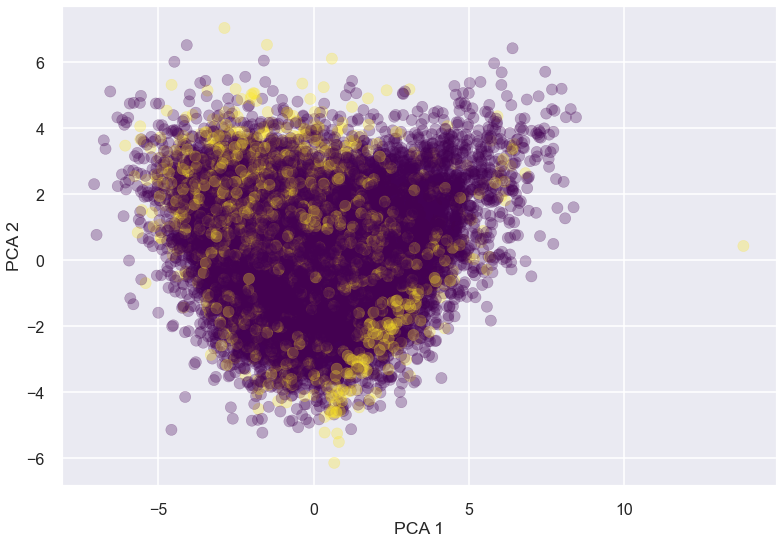

le part de variance expliquée est 0.32


In [21]:
fig = plt.figure()

ax = fig.add_subplot(111)
ax.scatter(data_2D[:,0], data_2D[:,1], c = target, cmap=plt.cm.viridis_r, alpha=0.3)

ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')

plt.show()

print("la part de variance expliquée est", round(pca.explained_variance_ratio_.sum(), 2))

**Sans limiter le nombre de composantes pricipales**

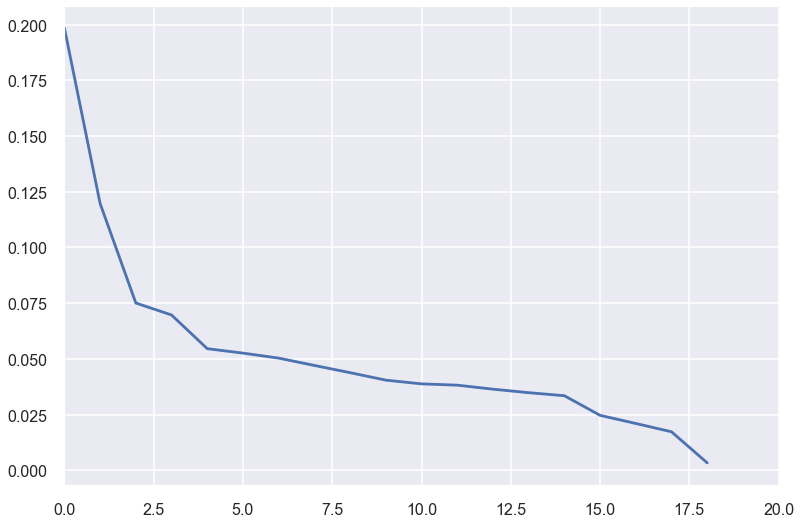

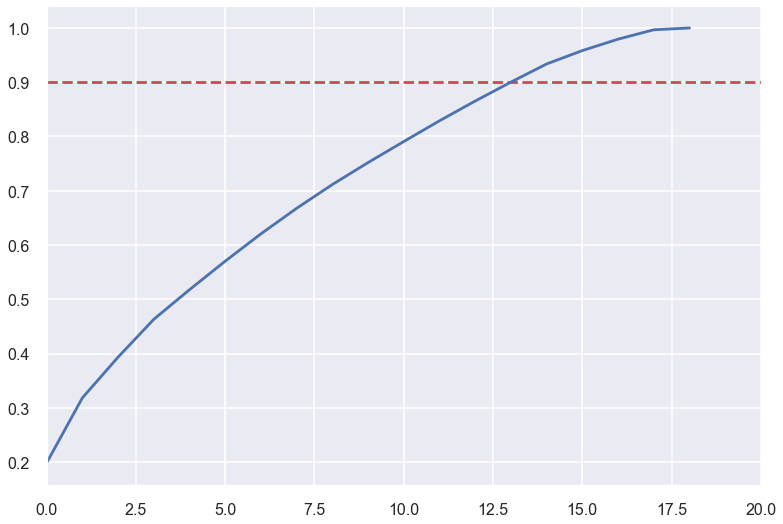

In [22]:
pca = PCA()
pca.fit(data)

plt.figure()
plt.xlim(0,20)
plt.plot(pca.explained_variance_ratio_)

plt.figure()
plt.xlim(0,20)
plt.axhline(y = 0.90, c="r", linestyle="--")
plt.plot(pca.explained_variance_ratio_.cumsum())




In [23]:
pca = PCA(n_components= 0.90)
pca.fit(data)
print("Nombre de composantes retenues : ", pca.n_components_)

Nombre de composantes retenues :  14


In [24]:
pca.components_.shape

(14, 19)

In [25]:
vars(pca)


{'n_components': 0.9,
 'copy': True,
 'whiten': False,
 'svd_solver': 'auto',
 'tol': 0.0,
 'iterated_power': 'auto',
 'random_state': None,
 'feature_names_in_': array(['Percentage_POP_FEMME_HOMME_19PLUS_VS_POP_TOTAL',
        'Percentage_CS_FEMME_HOMME_16PLUS_CS1_VS_POP_TOTAL',
        'Percentage_CS_FEMME_HOMME_16PLUS_CS2_VS_POP_TOTAL',
        'Percentage_CS_FEMME_HOMME_16PLUS_CS3_VS_POP_TOTAL',
        'Percentage_CS_FEMME_HOMME_16PLUS_CS4_VS_POP_TOTAL',
        'Percentage_CS_FEMME_HOMME_16PLUS_CS5_VS_POP_TOTAL',
        'Percentage_CS_FEMME_HOMME_16PLUS_CS6_VS_POP_TOTAL',
        'Percentage_CS_FEMME_HOMME_16PLUS_CS7_VS_POP_TOTAL',
        'Percentage_CS_FEMME_HOMME_16PLUS_CS8_VS_POP_TOTAL',
        'Percentage_DIP_FEMME_HOMME_16PLUS_N0_VS_POP_TOTAL',
        'Percentage_DIP_FEMME_HOMME_16PLUS_N1_VS_POP_TOTAL',
        'Percentage_DIP_FEMME_HOMME_16PLUS_N2_VS_POP_TOTAL',
        'Percentage_DIP_FEMME_HOMME_16PLUS_N3_VS_POP_TOTAL',
        'Percentage_DIP_FEMME_HOMME_16PLUS_N4_VS

***
### analyse discriminante linéaire(LDA) 

In [26]:
lda =LDA()
data_lda = lda.fit_transform(data, target)
data_lda.shape

(30867, 1)

**La LDA n'est adaptée que dans le cas de problèmes de classification supervisée avec des features continues où le nombre de classes à prédire est suffisamment important. C'est un algorithme nettement moins polyvalent que la PCA.**

In [27]:
# fig = plt.figure()
# ax = fig.add_subplot(111)
# ax.scatter(data_2D[:,0], data_2D[:,1], c = target, cmap=plt.cm.viridis_r, alpha=0.3)
# plt.show()

# fig= plt.figure()

# ax = fig.add_subplot(111)
# ax.scatter(data_lda[:,0], data_lda[:,0], c = target, cmap=plt.cm.Spectral)
# ax.set_xlabel('LD1')
# ax.set_xlabel('LD2')

***
***

## Random forest classifier

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report

**modélisation sans prendre en compte l'analyse PCA**  

In [29]:
data_mod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30867 entries, 0 to 30866
Data columns (total 19 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Percentage_POP_FEMME_HOMME_19PLUS_VS_POP_TOTAL     30867 non-null  float64
 1   Percentage_CS_FEMME_HOMME_16PLUS_CS1_VS_POP_TOTAL  30867 non-null  float64
 2   Percentage_CS_FEMME_HOMME_16PLUS_CS2_VS_POP_TOTAL  30867 non-null  float64
 3   Percentage_CS_FEMME_HOMME_16PLUS_CS3_VS_POP_TOTAL  30867 non-null  float64
 4   Percentage_CS_FEMME_HOMME_16PLUS_CS4_VS_POP_TOTAL  30867 non-null  float64
 5   Percentage_CS_FEMME_HOMME_16PLUS_CS5_VS_POP_TOTAL  30867 non-null  float64
 6   Percentage_CS_FEMME_HOMME_16PLUS_CS6_VS_POP_TOTAL  30867 non-null  float64
 7   Percentage_CS_FEMME_HOMME_16PLUS_CS7_VS_POP_TOTAL  30867 non-null  float64
 8   Percentage_CS_FEMME_HOMME_16PLUS_CS8_VS_POP_TOTAL  30867 non-null  float64
 9   Percen

In [30]:
X_train, X_test, y_train, y_test = train_test_split(data_mod, target, test_size=0.25, random_state=111)

In [31]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [32]:
X_train_scaled.describe()

,Percentage_POP_FEMME_HOMME_19PLUS_VS_POP_TOTAL,Percentage_CS_FEMME_HOMME_16PLUS_CS1_VS_POP_TOTAL,Percentage_CS_FEMME_HOMME_16PLUS_CS2_VS_POP_TOTAL,Percentage_CS_FEMME_HOMME_16PLUS_CS3_VS_POP_TOTAL,Percentage_CS_FEMME_HOMME_16PLUS_CS4_VS_POP_TOTAL,Percentage_CS_FEMME_HOMME_16PLUS_CS5_VS_POP_TOTAL,Percentage_CS_FEMME_HOMME_16PLUS_CS6_VS_POP_TOTAL,Percentage_CS_FEMME_HOMME_16PLUS_CS7_VS_POP_TOTAL,Percentage_CS_FEMME_HOMME_16PLUS_CS8_VS_POP_TOTAL,Percentage_DIP_FEMME_HOMME_16PLUS_N0_VS_POP_TOTAL,Percentage_DIP_FEMME_HOMME_16PLUS_N1_VS_POP_TOTAL,Percentage_DIP_FEMME_HOMME_16PLUS_N2_VS_POP_TOTAL,Percentage_DIP_FEMME_HOMME_16PLUS_N3_VS_POP_TOTAL,Percentage_DIP_FEMME_HOMME_16PLUS_N4_VS_POP_TOTAL,Percentage_DIP_FEMME_HOMME_16PLUS_N5_VS_POP_TOTAL,Percentage_DIP_FEMME_HOMME_16PLUS_N6_VS_POP_TOTAL,Percentage_INSCRITE_VS_POP_TOTAL,MED13,P13_POP
count,2.315000e+04,2.315000e+04,2.315000e+04,2.315000e+04,2.315000e+04,2.315000e+04,2.315000e+04,2.315000e+04,2.315000e+04,2.315000e+04,2.315000e+04,2.315000e+04,2.315000e+04,2.315000e+04,2.315000e+04,2.315000e+04,2.315000e+04,2.315000e+04,2.315000e+04
mean,-3.657348e-15,-1.761946e-16,-8.603719e-17,-1.089649e-16,7.356726e-18,6.334086e-17,-1.420846e-16,-2.795364e-16,-2.619887e-16,7.043082e-17,-6.935177e-17,2.625402e-16,-1.256506e-16,2.230997e-17,1.761969e-17,-2.731173e-16,-4.827959e-16,9.377476e-16,-1.781392e-17
std,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00
min,-6.685475e+00,-7.263510e-01,-1.444036e+00,-1.276992e+00,-2.408769e+00,-3.234961e+00,-2.453848e+00,-2.893229e+00,-2.368492e+00,-1.705287e+00,-1.626214e+00,-1.545287e+00,-3.115602e+00,-2.740049e+00,-2.074158e+00,-1.625861e+00,-6.683854e+00,-3.600528e+00,-1.132736e-01
25%,-6.668189e-01,-7.057348e-01,-6.255979e-01,-6.733249e-01,-6.820634e-01,-5.769663e-01,-6.846434e-01,-6.823436e-01,-6.249549e-01,-6.752194e-01,-6.666001e-01,-6.018336e-01,-5.448401e-01,-5.422978e-01,-6.301689e-01,-6.812083e-01,-6.378857e-01,-6.315784e-01,-1.030470e-01
50%,-3.510716e-02,-3.544480e-01,-1.439589e-01,-2.069735e-01,-1.958977e-02,2.377868e-02,-6.439819e-02,-1.171647e-01,-6.222152e-02,-1.285498e-01,-1.543894e-01,-1.063127e-01,-3.287517e-02,-5.384261e-02,-4.225141e-02,-1.562155e-01,-3.207583e-02,-1.481355e-01,-8.682555e-02
75%,6.334793e-01,2.633906e-01,4.616496e-01,4.588291e-01,6.536865e-01,5.685514e-01,5.879636e-01,5.661290e-01,5.266746e-01,5.283155e-01,4.811713e-01,4.588850e-01,5.075323e-01,4.795990e-01,5.502729e-01,5.023527e-01,6.163257e-01,4.561935e-01,-4.421483e-02
max,4.126902e+00,1.025744e+01,9.987824e+00,8.712588e+00,6.767748e+00,9.872714e+00,6.684788e+00,5.858193e+00,1.064706e+01,8.791145e+00,7.407314e+00,8.511730e+00,9.283387e+00,1.046556e+01,8.950485e+00,8.591757e+00,2.711700e+00,9.069853e+00,1.309242e+02


In [30]:
#Mise en place d'un random forest classifier
clf_rf = RandomForestClassifier()

In [31]:
clf_rf.fit(X_train_scaled,y_train)
y_pred_rf=clf_rf.predict(X_test_scaled)

In [32]:
#Matrice de confusion pour le Random Forest
pd.crosstab(y_test, y_pred_rf, rownames = ['Classe réelle'], colnames = ['Classe prédite'])

Classe prédite,0,1
Classe réelle,,
0,57,1042
1,35,6583


In [33]:
clf_rf.score(X_test_scaled, y_test).round(4)

0.8604

**Un GridSearch est nécessaire afin de trouver les meilleurs hyperparamères.**

**Gridsearch cas 1**

In [34]:
#Gridsearch sur RandomForest
param_grid_rf  = [{'n_estimators': [10, 50, 100],
                   'min_samples_leaf': [1, 3, 5],
                   'max_features': ['sqrt', 'log2']}]

gcv_rf = GridSearchCV(clf_rf, 
                      param_grid_rf,
                      cv=3,
                      n_jobs=-1)

gcv_results_rf=gcv_rf.fit(X_train_scaled, y_train)

gcv_results_rf.best_params_

{'max_features': 'log2', 'min_samples_leaf': 1, 'n_estimators': 100}

**Gridsearch cas 2**

In [92]:
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# max_features = ['auto', 'sqrt']
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)
# min_samples_split = [2, 5, 10]
# min_samples_leaf = [1, 2, 4]
# bootstrap = [True, False]
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}
# from pprint import pprint
# pprint(random_grid)


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [97]:
# gcv_rf = RandomizedSearchCV(estimator = clf_rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# # Fit the random search model
# gcv_results_rf = gcv_rf.fit(X_train_scaled, y_train)

# gcv_results_rf.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=  25.7s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time= 3.0min


/home/wgong/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=  25.8s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time= 3.0min
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=  25.4s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time= 1.1min
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time= 1.2min
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=  59.9s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time= 1.7min
[CV] END bootstrap=False, max_depth=10, 

[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=  58.9s
[CV] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=  22.9s
[CV] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=  22.8s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time= 1.3min
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time= 1.3min
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time= 1.0min
[CV] END bootstrap=False, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1800; total time= 2.8min
[CV] END bootstrap=True, max_depth=80

{'n_estimators': 800,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': False}

[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time= 1.3min
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1600; total time= 1.0min
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time= 1.6min
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1800; total time= 1.7min
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=2000; total time= 1.9min
[CV] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=  56.8s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time= 1.0min
[CV] END bootstrap=True, max_depth=8

[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time= 1.5min
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1600; total time= 1.1min
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1400; total time= 1.5min
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  12.9s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=  15.5s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1600; total time= 1.6min
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1600; total time= 1.7min
[CV] END bootstrap=False, max_depth=8

In [35]:
gcv_results_rf_best_params = gcv_results_rf.best_params_
gcv_results_rf_best_params

{'max_features': 'log2', 'min_samples_leaf': 1, 'n_estimators': 100}

In [37]:
# clf_rf=RandomForestClassifier(max_features='log2', min_samples_leaf=1, n_estimators=100)
clf_rf = RandomForestClassifier(n_jobs=-1,
                                max_features="log2",
                                n_estimators= 100,
                                min_samples_leaf = 1,
                                )
clf_rf.fit(X_train_scaled, y_train)
y_pred_rf=clf_rf.predict(X_test_scaled)

pd.crosstab(y_test, y_pred_rf,rownames=['réel'],colnames=['prediction'])

prediction,0,1
réel,,
0,68,1031
1,40,6578


In [38]:
score_rf=clf_rf.score(X_test_scaled,y_test)
print('Score of opimized Random Forest:',score_rf)

Score of opimized Random Forest: 0.8612154982506155


In [39]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.63      0.06      0.11      1099
           1       0.86      0.99      0.92      6618

    accuracy                           0.86      7717
   macro avg       0.75      0.53      0.52      7717
weighted avg       0.83      0.86      0.81      7717



In [40]:
target.value_counts(normalize=True)

1    0.855088
0    0.144912
Name: voting_result, dtype: float64

In [41]:
print("le nombre de communes ayant choisi B est", y_train.sum())
print("le nombre de communes ayant choisi A est", len(y_train) - y_train.sum())
print("l'échantillon d'apprentissage contient une disparité entre les deux choix à prédire !")

le nombre de communes ayant choisi B est 19776
le nombre de communes ayant choisi A est 3374
l'échantillon d'apprentissage contient une disparité entre les deux choix à prédire !


## **On doit effecuer un sur-échantillonnage (Oversampling) ou un sous-échantillonnage (Undersampling)**

### oversampling test

In [42]:
target.value_counts()

1    26394
0     4473
Name: voting_result, dtype: int64

In [43]:
from imblearn.metrics import classification_report_imbalanced
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, ClusterCentroids


**Over sampelling using Random Over Sampler and SMOTE**

In [44]:
X_train.shape

(23150, 19)

In [45]:
rOs = RandomOverSampler()
X_ro, y_ro = rOs.fit_resample(X_train_scaled, y_train)
print("Classes échantillon oversampled :", dict(pd.DataFrame(y_ro).value_counts()))

# SMOTE
smo = SMOTE()
X_sm, y_sm = smo.fit_resample(X_train_scaled, y_train)
print("Classes échantillon SMOTE :", dict(pd.DataFrame(y_sm).value_counts()))

Classes échantillon oversampled : {(0,): 19776, (1,): 19776}
Classes échantillon SMOTE : {(0,): 19776, (1,): 19776}


**entrainer le modèle Randon Forest avec Random Over Sampler**

In [46]:
clf_rf_over_sampled = RandomForestClassifier(n_jobs = -1,
                                             max_features='log2', 
                                             min_samples_leaf=1, 
                                             n_estimators=100)
clf_rf_over_sampled.fit(X_ro, y_ro)
y_pred_rf_over_sampled = clf_rf_over_sampled.predict(X_test_scaled)

pd.crosstab(y_test, y_pred_rf_over_sampled,rownames=['réel'],colnames=['prediction'])

prediction,0,1
réel,,
0,146,953
1,131,6487


In [47]:
print(classification_report(y_test,y_pred_rf_over_sampled))

              precision    recall  f1-score   support

           0       0.53      0.13      0.21      1099
           1       0.87      0.98      0.92      6618

    accuracy                           0.86      7717
   macro avg       0.70      0.56      0.57      7717
weighted avg       0.82      0.86      0.82      7717



**entrainer le modèle Randon Forest avec SMOTE**

In [48]:
clf_rf_SMOTE = RandomForestClassifier(n_jobs = -1,
                                      max_features='log2', 
                                      min_samples_leaf=1, 
                                      n_estimators=100
                                     )
clf_rf_SMOTE.fit(X_sm, y_sm)
y_pred_rf_SMOTE = clf_rf_SMOTE.predict(X_test_scaled)

pd.crosstab(y_test, y_pred_rf_SMOTE,rownames=['réel'],colnames=['prediction'])

prediction,0,1
réel,,
0,469,630
1,920,5698


In [49]:
print(classification_report(y_test,y_pred_rf_SMOTE))

              precision    recall  f1-score   support

           0       0.34      0.43      0.38      1099
           1       0.90      0.86      0.88      6618

    accuracy                           0.80      7717
   macro avg       0.62      0.64      0.63      7717
weighted avg       0.82      0.80      0.81      7717



**un autre gridsearch est nécessaire**

In [156]:
# clf_rf_SOMTE = RandomForestClassifier()
# gcv_rf_SMOTE = RandomizedSearchCV(estimator = clf_rf_SOMTE, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# # Fit the random search model
# gcv_results_rf_SMOTE = gcv_rf_SMOTE.fit(X_train_scaled, y_train)

# gcv_results_rf_SMOTE.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=  27.8s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time= 3.3min


/home/wgong/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=  27.8s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time= 3.3min
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time= 1.1min
[CV] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=  25.1s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time= 1.5min
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1600; total time= 2.0min
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1800; total time= 3.0min
[CV] END bootstrap=False, max_depth=60,

{'n_estimators': 800,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 90,
 'bootstrap': False}

[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time= 1.7min
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1600; total time= 1.3min
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1400; total time= 1.6min
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=  18.8s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1200; total time= 2.1min
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1800; total time= 2.2min
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=2000; total time= 3.4min
[CV] END bootstrap=False, max_dep

[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time= 1.5min
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1600; total time= 1.3min
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time= 1.3min
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time= 1.8min
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time= 1.4min
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time= 1.4min
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1800; total time= 3.0min
[CV] END bootstrap=False, max_depth=3

[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time= 1.6min
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time= 1.3min
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time= 1.7min
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1800; total time= 2.2min
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1600; total time= 2.0min
[CV] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time= 1.1min
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time= 1.1min
[CV] END bootstrap=True, max_depth=80

In [157]:
# gcv_results_rf_SMOTE.best_params_

{'n_estimators': 800,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 90,
 'bootstrap': False}

In [54]:
# clf_rf_SMOTE = RandomForestClassifier(n_jobs=-1,
#                                       n_estimators= 800,
#                                       min_samples_split =5,
#                                       min_samples_leaf = 1,
#                                       max_features ='sqrt',
#                                       max_depth = 90,
#                                       bootstrap= False)                                
# clf_rf_SMOTE.fit(X_sm, y_sm)
# y_pred_rf_SMOTE = clf_rf_SMOTE.predict(X_test_scaled)

# pd.crosstab(y_test, y_pred_rf_SMOTE,rownames=['réel'],colnames=['prediction'])

prediction,0,1
réel,,
0,279,679
1,586,5588


In [55]:
# print(classification_report(y_test,y_pred_rf_SMOTE))

              precision    recall  f1-score   support

           0       0.32      0.29      0.31       958
           1       0.89      0.91      0.90      6174

    accuracy                           0.82      7132
   macro avg       0.61      0.60      0.60      7132
weighted avg       0.82      0.82      0.82      7132



**courbe lift cumulée**

***
* La courbe life cumulée nous permet de bien cibler les communes pendant la campagne électorale. 
* Par exemple, en sélectionnant ~30% des communes selons le modèle de prédiction, on pourra atteindre ~60% des communes qui ont une tendance à voter pour le choix A. 


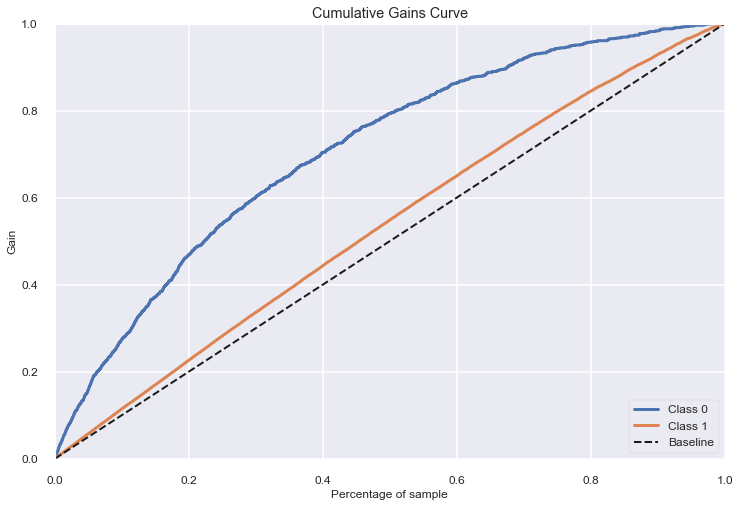

In [50]:
import scikitplot as skplot
y_probas = clf_rf_SMOTE.predict_proba(X_test_scaled)
skplot.metrics.plot_cumulative_gain(y_test, y_probas, figsize=(12, 8))
plt.show()

**Borderline SMOTE oversamplling**

In [52]:
from imblearn.over_sampling import BorderlineSMOTE
bSMOTE = BorderlineSMOTE()
X_bsm, y_bsm = bSMOTE.fit_resample(X_train_scaled, y_train)


In [53]:
clf_rf_BordrelineSMOTE = RandomForestClassifier(n_jobs = -1,
                                                max_features='log2', 
                                                min_samples_leaf=1, 
                                                n_estimators=100)
clf_rf_BordrelineSMOTE.fit(X_bsm, y_bsm)
y_pred_rf_BordrelineSMOTE = clf_rf_BordrelineSMOTE.predict(X_test_scaled)

pd.crosstab(y_test, y_pred_rf_BordrelineSMOTE,rownames=['réel'],colnames=['prediction'])

prediction,0,1
réel,,
0,464,635
1,889,5729


In [54]:
print(classification_report(y_test,y_pred_rf_BordrelineSMOTE))

              precision    recall  f1-score   support

           0       0.34      0.42      0.38      1099
           1       0.90      0.87      0.88      6618

    accuracy                           0.80      7717
   macro avg       0.62      0.64      0.63      7717
weighted avg       0.82      0.80      0.81      7717



### undersampling test

**Under sampelling avec Random Under Sampler et Cluster Centroids**

In [55]:
rUs = RandomUnderSampler()
X_ru, y_ru = rUs.fit_resample(X_train_scaled, y_train)
print("Classes échantillon underssampled :", dict( pd.DataFrame(y_ru).value_counts() ))

#Centroides
cc = ClusterCentroids()
X_cc, y_cc = cc.fit_resample(X_train_scaled, y_train)
print("Classes échantillon cluster centroids :", dict( pd.DataFrame(y_cc).value_counts() ))

Classes échantillon underssampled : {(0,): 3374, (1,): 3374}
Classes échantillon cluster centroids : {(0,): 3374, (1,): 3374}


**entrainer le modèle Randon Forest avec Random Under Sampler**

In [56]:
clf_rf_under_sampled = RandomForestClassifier(n_jobs = -1,
                                              max_features='log2', 
                                              min_samples_leaf=1, 
                                              n_estimators=100)
clf_rf_under_sampled.fit(X_ru, y_ru)
y_pred_rf_under_sampled = clf_rf_under_sampled.predict(X_test_scaled)

pd.crosstab(y_test, y_pred_rf_under_sampled,rownames=['réel'],colnames=['prediction'])

prediction,0,1
réel,,
0,789,310
1,2198,4420


In [57]:
print(classification_report(y_test,y_pred_rf_under_sampled))

              precision    recall  f1-score   support

           0       0.26      0.72      0.39      1099
           1       0.93      0.67      0.78      6618

    accuracy                           0.68      7717
   macro avg       0.60      0.69      0.58      7717
weighted avg       0.84      0.68      0.72      7717



**entrainer le modèle Randon Forest avec Cluster Centroids**

In [58]:
clf_rf_cc = RandomForestClassifier(n_jobs=-1,
                                   max_features='log2', 
                                   min_samples_leaf=1, 
                                   n_estimators=100)
clf_rf_cc.fit(X_cc, y_cc)
y_pred_rf_cc = clf_rf_cc.predict(X_test_scaled)

pd.crosstab(y_test, y_pred_rf_cc, rownames=['réel'],colnames=['prediction'])


prediction,0,1
réel,,
0,817,282
1,3240,3378


In [59]:
print(classification_report(y_test,y_pred_rf_cc))

              precision    recall  f1-score   support

           0       0.20      0.74      0.32      1099
           1       0.92      0.51      0.66      6618

    accuracy                           0.54      7717
   macro avg       0.56      0.63      0.49      7717
weighted avg       0.82      0.54      0.61      7717



### le modèle Randon Forest avec SMOTE est plus performant que RF avec simple over sampler. 

Cependant, la spécificité n'est toujours pas parfaite. Afin d'améliorer le modèle, on peut par example changer le seuil de probabilité de prédiction pour la classe 0.

In [84]:
threshold = 0.52
probs  = clf_rf_SMOTE.predict_proba(X_test_scaled)
pred_class = (probs[:,1] >= threshold).astype("int")
print(pd.crosstab(y_test, pred_class, rownames=['réel'],colnames=['prediction']))
print(classification_report(y_test,pred_class))


prediction    0     1
réel                 
0           496   603
1           964  5654
              precision    recall  f1-score   support

           0       0.34      0.45      0.39      1099
           1       0.90      0.85      0.88      6618

    accuracy                           0.80      7717
   macro avg       0.62      0.65      0.63      7717
weighted avg       0.82      0.80      0.81      7717



### Tester  AdaBoost

In [63]:
from sklearn.ensemble import AdaBoostClassifier

In [65]:
ac = AdaBoostClassifier(base_estimator=clf_rf_SMOTE, n_estimators=400)
ac.fit(X_sm, y_sm)
print("score est ", ac.score(X_test_scaled, y_test))

score est  0.8031618504600233


In [66]:
y_pred_ab = ac.predict(X_test_scaled)
print(pd.crosstab(y_test, y_pred_ab, rownames=['réel'],colnames=['prediction']))
print(classification_report(y_test,y_pred_ab))


prediction    0     1
réel                 
0           482   617
1           902  5716
              precision    recall  f1-score   support

           0       0.35      0.44      0.39      1099
           1       0.90      0.86      0.88      6618

    accuracy                           0.80      7717
   macro avg       0.63      0.65      0.64      7717
weighted avg       0.82      0.80      0.81      7717



**Les prédictions sont légèrement plus performantes**

## tester Voting Classifier

In [67]:
from sklearn import neighbors
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier

In [68]:
clf_knn_chosen = neighbors.KNeighborsClassifier(metric = 'minkowski', n_neighbors = 1)
clf_rf_chosen  = RandomForestClassifier(max_features='log2', min_samples_leaf=1, n_estimators=100)
clf_svm_chosen = svm.SVC(C = 1, gamma = 0.001, kernel = 'linear')
clf_gb_chosen = GradientBoostingClassifier(learning_rate = 0.01, loss ='deviance', n_estimators=250)

In [69]:
voting_clf = VotingClassifier(n_jobs=-1,
                              estimators=[('knn', clf_knn_chosen),
                                          ('rf', clf_rf_chosen),
                                          ('svm', clf_svm_chosen),
                                          ('gb',clf_gb_chosen),
                                          ('adaboost', ac)],
                              voting='hard')
voting_clf.fit(X_sm, y_sm)
y_pred_voting_clf=voting_clf.predict(X_test_scaled)


In [70]:
print(pd.crosstab(y_test, y_pred_voting_clf, rownames=['réel'],colnames=['prediction']))
print(classification_report(y_test,y_pred_voting_clf))


prediction     0     1
réel                  
0            550   549
1           1130  5488
              precision    recall  f1-score   support

           0       0.33      0.50      0.40      1099
           1       0.91      0.83      0.87      6618

    accuracy                           0.78      7717
   macro avg       0.62      0.66      0.63      7717
weighted avg       0.83      0.78      0.80      7717



### résumé des résultats des modèles

In [115]:
#  Loading the pickles

model_list_name = ["clf_rf", "clf_rf_over_sampled", "clf_rf_SMOTE", "clf_rf_under_sampled", "clf_rf_cc", "ac", "voting_clf"]
pred_model = ["y_pred_rf", "y_pred_rf_over_sampled", "y_pred_rf_SMOTE", "y_pred_rf_under_sampled", "y_pred_rf_cc", "y_pred_ab", "y_pred_voting_clf"]

for n, m in zip(model_list_name, pred_model):
    with open(n+'.pkl', 'rb') as f:
        n = pickle.load(f) 
        locals()[m]=n.predict(X_test_scaled)



In [118]:
print("Random forest simple après GridSearch:\n")
print(pd.crosstab(y_test, y_pred_rf, rownames=['réel'],colnames=['prediction']))
print(classification_report(y_test,y_pred_rf))
print("\n\n")
print("####################")
print("Random forest avec Random Over Sampler :\n")
print(pd.crosstab(y_test, y_pred_rf_over_sampled, rownames=['réel'],colnames=['prediction']))
print(classification_report(y_test,y_pred_rf_over_sampled))
print("\n\n")
####################
print("Random forest avec SMOTE oversampling :\n")
print(pd.crosstab(y_test, y_pred_rf_SMOTE, rownames=['réel'],colnames=['prediction']))
print(classification_report(y_test,y_pred_rf_SMOTE))
print("\n\n")
####################
# print("Random forest avec SMOTE et un changement du seuil de prédiction :\n")
# print(pd.crosstab(y_test, pred_class, rownames=['réel'],colnames=['prediction']))
# print(classification_report(y_test,pred_class))

####################
print("Random forest avec Random Under Sampler :\n")
print(pd.crosstab(y_test, y_pred_rf_under_sampled, rownames=['réel'],colnames=['prediction']))
print(classification_report(y_test,y_pred_rf_under_sampled))
print("\n\n")
####################
print("Random forest avec Cluster Centroids :\n")
print(pd.crosstab(y_test, y_pred_rf_cc, rownames=['réel'],colnames=['prediction']))
print(classification_report(y_test,y_pred_rf_cc))
print("\n\n")
####################
print("Adaboost :\n")
print(pd.crosstab(y_test, y_pred_ab, rownames=['réel'],colnames=['prediction']))
print(classification_report(y_test,y_pred_ab))
print("\n\n")
####################
print("Voting Classfier :\n")
print(pd.crosstab(y_test, y_pred_voting_clf, rownames=['réel'],colnames=['prediction']))
print(classification_report(y_test,y_pred_voting_clf))
print("\n\n")

print("Si on garde les Rappels comme critère d'evaluation, on trouve que le Voting Class est le plus performant. \n")


Random forest simple après GridSearch:

prediction   0     1
réel                
0           68  1031
1           40  6578
              precision    recall  f1-score   support

           0       0.63      0.06      0.11      1099
           1       0.86      0.99      0.92      6618

    accuracy                           0.86      7717
   macro avg       0.75      0.53      0.52      7717
weighted avg       0.83      0.86      0.81      7717




####################
Random forest avec Random Over Sampler :

prediction    0     1
réel                 
0           146   953
1           131  6487
              precision    recall  f1-score   support

           0       0.53      0.13      0.21      1099
           1       0.87      0.98      0.92      6618

    accuracy                           0.86      7717
   macro avg       0.70      0.56      0.57      7717
weighted avg       0.82      0.86      0.82      7717




Random forest avec SMOTE oversampling :

prediction    0     1
ré

***

#### sauvegarder les modèles entraînés

In [87]:
import pickle

In [88]:
model_list_name = ["clf_rf", "clf_rf_over_sampled", "clf_rf_SMOTE", "clf_rf_under_sampled", "clf_rf_cc", "ac", "voting_clf"]
model_list = [clf_rf, clf_rf_over_sampled, clf_rf_SMOTE, clf_rf_under_sampled, clf_rf_cc, ac, voting_clf]

for (m, n) in zip(model_list, model_list_name):
    pickle.dump(m, open(n+'.pkl', 'wb'))
   

## Interprétabilité du modèle Random Forest avec SHAP

***
* L'objectif est d'expliquer la différence entre la prévision réelle et la prévision moyenne. 
* La valeur de Shapley est la moyenne (pondérée) des contributions marginales. SHAP est une amélioration des valeurs de Shapley. SHAP attribue à chaque variable une valeur d'importance pour une prédiction particulière. 
.


In [88]:
import shap
import skater
shap.initjs()

In [ ]:
# le calculs des shap_values est un peu plus d'1h. Les résultats ont été enregistrés dans un pickle fichier. 
# De plus, shap package ne supporte pas encore le modèle Voting Class et Adaboost; 
# explainer = shap.TreeExplainer(clf_rf_SMOTE)
# shap_values = explainer.shap_values(X_test_scaled)
# with open('shap_explainer_et_shap_values.pkl', 'wb') as f:
#         pickle.dump([explainer, shap_values], f)
    

***
**Charger les pickles**

In [89]:
import pickle

with open('clf_rf_SMOTE.pkl', 'rb') as f:
    clf_rf_SMOTE = pickle.load(f)
with open('shap_explainer_et_shap_values.pkl', 'rb') as f:
    explainer, shap_values = pickle.load(f)
    


**interprétabilité globale**

***
CS1 := Agriculteurs exploitants \
CS2 := Artisans, commerçants, chefs d'entreprise \
CS3 := Cadres et Professions intellectuelles supérieures \
CS4 := Professions intermédiaires \
CS5 := Employés \
CS6 := Ouvriers \
CS7 := Retraités \
CS8 := Autres sans activité professionnelle

diplôme N0 := Aucun diplôme \
diplôme N1 := Diplôme de niveau CEP, Certificat d'études primaires, Niveau1 \
diplôme N2 := Diplôme de niveau BEPC, Diplôme national du brevet, niveau3 \
diplôme N3 := Diplôme de niveau CAP-BEP, certificat d’aptitude professionnelle (CAP) ou brevet d’études professionnelles (BEP) \
diplôme N4 :=  Diplôme de niveau bac général ou technique, Baccalauréat, niveau4 \
diplôme N5 := Diplôme universitaire de 1er cycle, BTS, DUT, licence, Niveau5-6 \
diplôme N6 := Diplôme universitaire du 2ème cycle, master, niveau7


**Les moyennes de l'influence des features se divisent en 4 catégories.**
* Le revenu médian est la feature la plus influante. 
* Quand aux classes sociales, la proportion des Agriculteurs exploitants, Retraités, Ouvriers au sein de la population totale d'une commune a plus d'influence que celle d'autres classes. Cette observation est un peu contre-intuitive. En effet, cela ne signifie pas que les 3 classes soient les classes influentes. Voir l'analyse ci-dessous. 

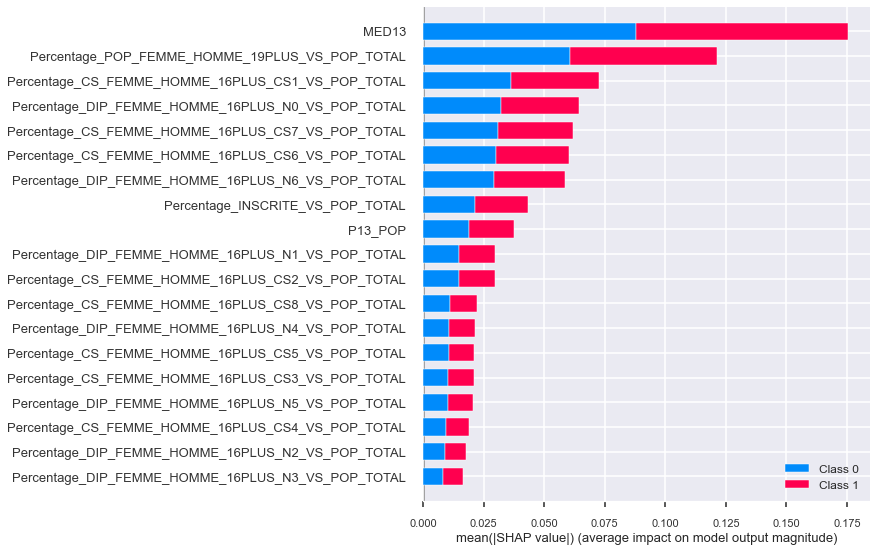

In [60]:
shap.summary_plot(shap_values, X_test_scaled, plot_type="bar")

***
* La figure suivante présente les distributions des valeurs SHAP pour la prédiction de la classe A.
* L'influence du revenu médian est considérable. Plus une commune est riche, plus faible est la probabilité que la population vote pour le choix B (les valeurs SHAP sont négatives). De plus, la plupart des communes modestes votent pour le choix A. 
* Quand la proportion d'Agriculteurs diminue, sa valeur SHAP s'accroît. On peut en déduire que leur niveau d'absence dans une commnue influence beaucoup le résultat des votes. On peut constater aussi que les influences sont bien dans les deux sens sans biai.
* Les retraités et les ouvriers ont des choix presque inversés.
* La classe Cadres et Professions intellectuelles supérieures ont une influence très faible du fait qu'ils ont souvent des opinions diverses, voir les figures suivantes.
* Les communes avec une population totale moins importante ont une tendance à voter pour le choix B.  
* Les populations ayant un niveau de diplôme master et plus préfèrent voter pour le choix A.
* Le taux d'inscription d'une commune n'a pas suffisamment d'impact sur les résultats de vote sauf pour les communes faiblemlent peuplées.

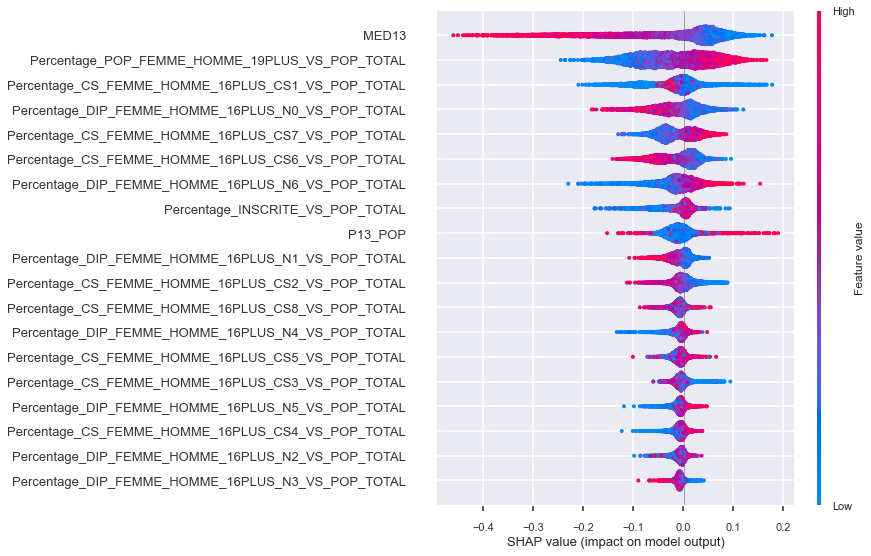

In [61]:
shap.summary_plot(shap_values[0], X_test_scaled.values, feature_names = X_test.columns) # choix A

***
Les deux figures suivantes présentent les interprétabilités locales, pour deux cas particulers, une commune ayant voté pour le choix B, et l'autre pour le choix A. 
* Le modèle a bien réussi à prédire le choix de chacune des deux communes.
* Pour la commune La Somme, la force des features telles que la CS1, la population de plus 19ans et la CS6 etc a bien poussé le choix de la population vers le B.
* Pour Landes, les interactions des forces des features sont plus complexes et l'effet final est le choix A. 


In [83]:
data_exploitable_oringinal.iloc[27395,:][["Libellé du département","Choix A", "Choix B"]]

Libellé du département    SOMME
Choix A                     250
Choix B                     437
Name: 27395, dtype: object

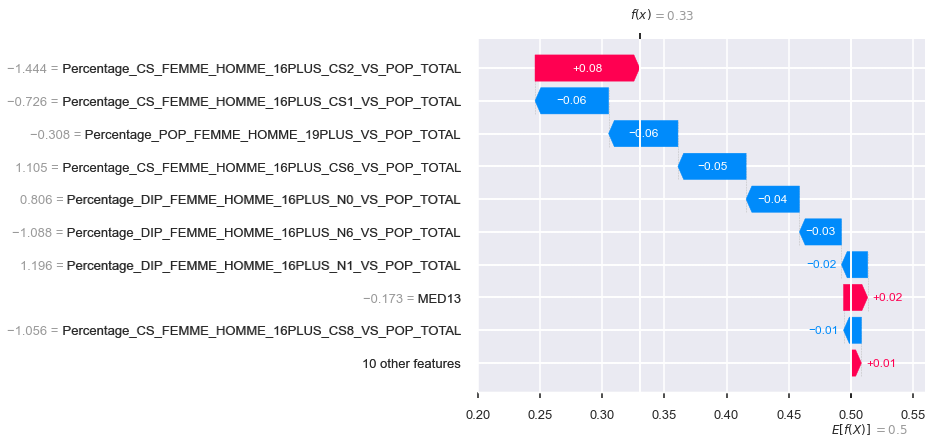

In [84]:
row = 1668 # choix B, La SOMME
shap.waterfall_plot(shap.Explanation(values=shap_values[0][row], 
                                              base_values=explainer.expected_value[0], data=X_test_scaled.iloc[row],  
                                         feature_names=X_test.columns.tolist()))

In [85]:
data_exploitable_oringinal.iloc[12887,:][["Libellé du département","Choix A", "Choix B"]]

Libellé du département    LANDES
Choix A                      238
Choix B                      230
Name: 12887, dtype: object

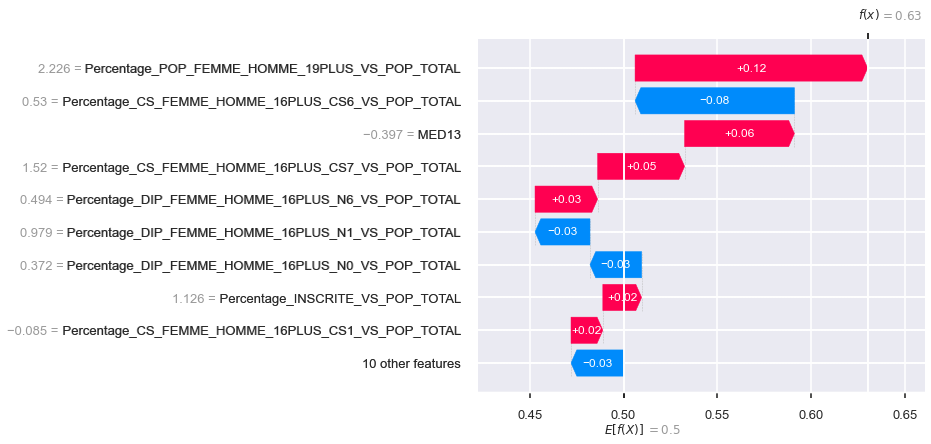

In [86]:
row = 5703 # choix A, LANDES
shap.waterfall_plot(shap.Explanation(values=shap_values[0][row], 
                                              base_values=explainer.expected_value[0], data=X_test_scaled.iloc[row],  
                                         feature_names=X_test.columns.tolist()))

**Les 3 figures suivantes nous montrent les influences des trois classes sociales : Agriculteurs exploitants, Retraités, Ouvriers**
* Dès que la proportion de l'agriculteurs exploitants dépasse ~6%, leurs valeurs SHAP apporte le choix vers B. Ils ont un choix clair.
* le même phénomène a été observé vis-à-vis des classe retraités et ouvriers. Ils ont tous un choix définitif et clair au sein d'une commune donnée.
* Par contre, la classe 3, Cadres et Professions intellectuelles supérieures, a toujours une hésitation pour son choix. Cela explique que l'influence de la classe 3 est beaucoup plus faible que d'autres classes sociales.



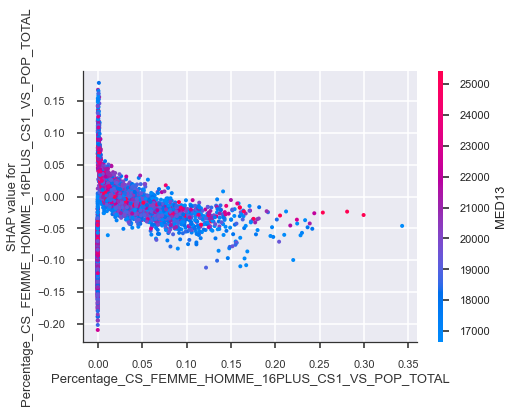

In [64]:
shap.dependence_plot("Percentage_CS_FEMME_HOMME_16PLUS_CS1_VS_POP_TOTAL", shap_values[0], X_test, interaction_index="MED13")

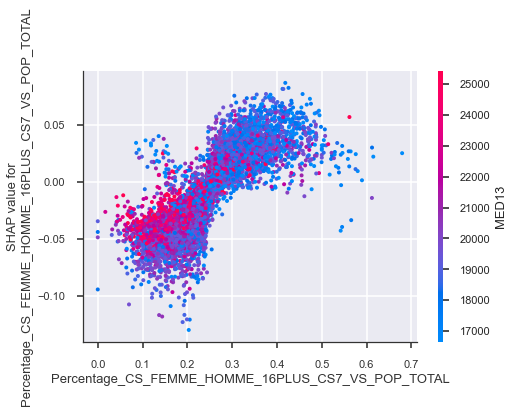

In [69]:
shap.dependence_plot("Percentage_CS_FEMME_HOMME_16PLUS_CS7_VS_POP_TOTAL", shap_values[0], X_test, interaction_index="MED13")

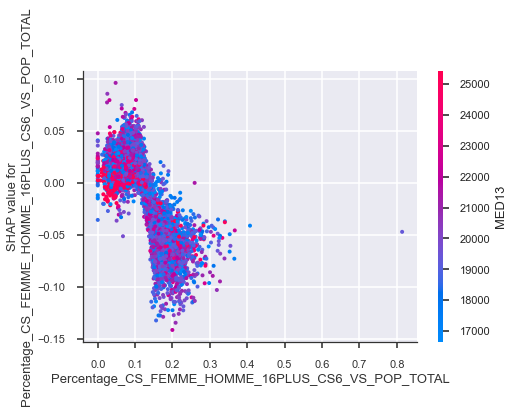

In [70]:
shap.dependence_plot("Percentage_CS_FEMME_HOMME_16PLUS_CS6_VS_POP_TOTAL", shap_values[0], X_test, interaction_index="MED13")

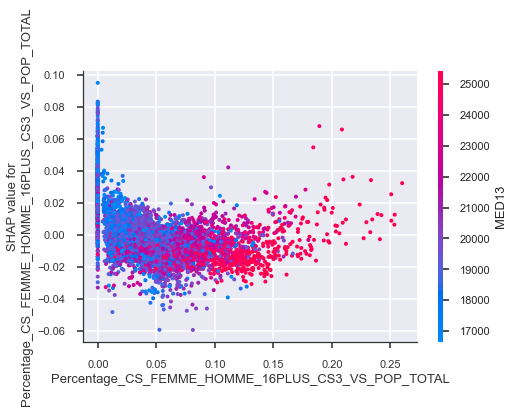

In [66]:
shap.dependence_plot("Percentage_CS_FEMME_HOMME_16PLUS_CS3_VS_POP_TOTAL", shap_values[0], X_test, interaction_index="MED13")

***
La figure dessous montre encore une fois que le revenu médian est bien corrélé avec le choix final d'une commune. 


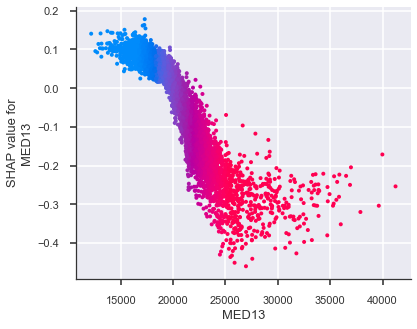

In [67]:
shap.dependence_plot("MED13", shap_values[0], X_test, interaction_index="MED13") # Choix A

In [91]:
shap.force_plot(explainer.expected_value[0], shap_values[0][:1000], X_test[:1000])


### Conclusions
* Le dataset éprouve une disparité très importante des classes; ce qui donne une très bonne prédiction pour la classe majoritaire (choix B) et une faible performance pour la classe minoritaire (Choix A).
* L’entraînement type imbalanced learning est nécessaire pour surmonter le déséquilibrage entre les deux classes.

* J’ai choisi au premier abord le modèle Random Forest comme le modèle de base. Deux types de sur-échantillonnage (simple over sampler et SMOTE) et deux types (simple under sampler et Cluster Centroid) de sous-échantillonnage ont été testés. Le RF est un modèle qui ne souffre pas de problème d'over-fitting et est relativement simple à interpréter.
* J’ai observé que les résultats du modèle RF sans considérer la disparité du dataset n’étaient pas utilisables d'un point de vue performance. Néanmoins, après les sur-échantillonnages et  sous-échantillonnages, les résultats des prédictions étaient nettement meilleurs. De plus, un tuning du seuil de la probabilité de prédiction provoque aussi une augmentation de la performance du modèle.
* les modèles d’ensemble comme Adaboost, Voting Class ont été testés également.
* En termes de critères d’évaluations, les rappels ont été choisis. Le modèle Voting class est donc le plus performant.
* une étude d'interprétabilité a été menée afin de bien comprendre les importances des features. 
